# Project 2
# Rebalancing Strategy 

#### 2022-2학기
#### Version: 2022-11-11-v1

> 분반:
>
> 학번:
>
> 학과:
>
> 이름:

### To Do List

- rebalancing() 완성 (만약 BTC, ETH 외의 암호화폐를 추가적으로 고려하고 싶은 경우)
- 여러 자산 비율을 사용하여 성능 테스트
-译：完成rebalancing() (如果想追加考虑BTC、 ETH以外的加密货币)
-译：使用多个资产比率进行性能测试

In [ ]:
# 런타임이 종료되면 이 코드셀은 매번 다시 실행해야 합니다. 
#译：运行时间结束后，这个code cell（代码单元）每次都要重新运行。

# pyupbit 설치 （安装pyupbit）
!pip install pyupbit

In [1]:
# Import

import numpy as np
import pandas as pd
import datetime

import pyupbit


In [2]:
# trading_helper 설치 및 버전 확인 （译： trading_helper 安装和版本确认）

# !wget https://esohn.be/python/trading_helper.py -O trading_helper.py

import trading_helper
import importlib
importlib.reload(trading_helper)

print( f'Trading Helper Version: {trading_helper.TRADING_HELPER_VERSION}'  )

Trading Helper Version: 2022.11.30-v1


### AUTH_CODE는 반드시 자신의 Auth Code로 변경해야 합니다.
#译：AUTH_CODE必须更改为自己的Auth Code。

In [3]:
# ------------------------------------------------------------------------------------------------------
# https://esohn.be/account 의 AUTH CODE 입력
# ------------------------------------------------------------------------------------------------------

'''
AUTH_CODE = 'f587ea651febd5446efc61d5e3fef123'  -> 아래에 이렇게 auth code를 붙여넣으세요.（请在下面这样粘贴auth code。）
'''
AUTH_CODE = '2319d129e17e2cd365363ef4ebfb4596'

# Do not edit
trading_helper.set_auth_code( AUTH_CODE )


Log updated! (2022-2 YCS1009-01 CAI, LUYAO)


### 아래 코드셀을 복사 해서 프로젝트 코드 페이지에 붙여넣으세요
#译：复制下面的code cell（代码单元）并粘贴到项目code页上




In [6]:
# ------------------------------------------------------------------------------------------------------
# - 코드를 완성했다면 이 코드셀만 복사해서 competition 페이지 Volatility Breakout 탭에 라운드 별 코드 항목으로 붙여넣습니다.
# - 연습할 때는 https://esohn.be/competition 페이지의 에디터에서 직접 연습하지 말고 Colab에서 연습하세요. 
#   (노트북 연습 횟수가 서버에 기록되며 또 노트북 자체에 변경 history가 축척 됩니다.)
#译：
#完成代码后，只需复制此代码单元（code cell）并将其作为每轮代码条目粘贴到competition页面的“Volatility Breakout”中。
#练习的时候不要在https://esohn.be/competition页面的编辑, 请在Colab里练习
#（笔记本电脑练习次数将被记录在服务器上，笔记本电脑本身也会积累变更history。）
# ------------------------------------------------------------------------------------------------------

# Given Code Version 2022.11.10-v1

import numpy as np
import pandas as pd
import datetime

# rebalancing() 암호화폐 포트폴리오 리밸런싱 함수 译：rebalancing() Cryptocurrency portfolio rebalancing函数
'''
* ratio_  자산배분 비율 (총 합은 반드시 1.0이어야 함)
  투자하지 않는 암호화폐는 0으로 남겨둠
译：ratio_ 资产配置比率( 总计必须为 1.0)
  不投资的Cryptocurrency保留为0
  
  예) 원화 10%, 비트코인(BTC) 50%, 이더리움(ETH) 40%  （例如,韩元10%、比特币(BTC)50%、Ethereum(ETH)）
      ratio_krw = 0.1
      ratio_btc = 0.5
      ratio_eth = 0.4
      ratio_doge = 0.0
      ratio_ada = 0.0

  예) 원화 70%, 비트코인(BTC) 10%, 이더리움(ETH) 10%, 도지코인(DOGE) 5%, 에이다(ADA) 5%  （例如,韩元70%、比特币(BTC)10%、Ethereum(ETH)10%、Dogecoin(DOGE)5%、Ada(ADA)5%）
      ratio_krw = 0.7
      ratio_btc = 0.1
      ratio_eth = 0.1
      ratio_doge = 0.05
      ratio_ada = 0.05

* threshold - 최소한으로 요구되는 총 자산 대비 변동 비율 (%) （* threshold - 最低要求总资产与变动比率(%)）

  기본값 0: 조금이라도 변동될 때 매매 （基本值 0: 稍有变动时买卖）
  예) 0.001: 전체 자산의 0.1% 변동시 매매, 0.005: 전체 자산의 0.5% 변동시 매매 （例) 0.001:全体资产的0.1%变动时买卖,0.005:全体资产的0.5%变动时买卖）


* fee - 수수료, 기본값 0.001 (변경 없음)  （fee - 手续费， 默认值/基本值 0.001 (无变化)）

* init_krw - 초기 투자금액, 기본값 100000000 (변경 없음) （init_krw - 初始投资金额， 默认值/基本值为 10000000 (无变化)）
'''

# Qualification 라운드 에서는 지정된 암호화폐 비율과 threshold 0.0을 사용해야 하며 （Qualification回合中必须使用指定的Cryptocurrency比率和threshold 0.0）
# 그 외의 라운드에서는 암포화폐 비율과 threshold를 자유롭게 사용할 수 있음 （在其他回合中，可以自由使用Cryptocurrency比率和threshold。）

# ------------------------------------------------
# EDITABLE (1)
#
DEFAULT_RATIO_KRW = 1.0
DEFAULT_RATIO_BTC = 0.0
DEFAULT_RATIO_ETH = 0.0
DEFAULT_RATIO_DOGE = 0.0
DEFAULT_RATIO_ADA = 0.0

DEFAULT_THRESHOLD = 0.0 # Qualification 라운드 에서는 이 값을 0.0으로 （在DEFAULT_THRESHOLD=0.0 # Qualification回合中，将此值设为0.0）
# ------------------------------------------------

def rebalancing( df, ratio_krw=DEFAULT_RATIO_KRW, ratio_btc=DEFAULT_RATIO_BTC, ratio_eth=DEFAULT_RATIO_ETH, ratio_doge=DEFAULT_RATIO_DOGE, ratio_ada=DEFAULT_RATIO_ADA, threshold=DEFAULT_THRESHOLD, fee=0.001, init_krw=100000000 ):

    # -------------------------------------------------------------------------------
    # DO NOT EDIT
    #
    ratio_sum = ratio_krw + ratio_btc + ratio_eth + ratio_doge + ratio_ada
    if abs(ratio_sum - 1.0) > 0.0001:
        print(f'The sum of the ratios must be 1. ({ratio_sum})')
        return
    # -------------------------------------------------------------------------------

    row_index = 0

    # 데이터프레임의 모든 행에 대해서 반복 （重复数据帧中的所有行）
    for row_index in range( len( df ) ):

        # 현재 데이터: cur_data  （现在的数据: cur_data）
        cur_data = df.loc[ row_index, : ].copy()
        # 이전 데이터: prev_data （以前的数据：prev_data）
        if row_index > 0:
            prev_data = df.loc[ row_index-1, : ].copy()



        #------------------------
        # Balance 계산 (bal_)。（计算 Balance (bal_)）
        # 하루 전의 계산 후 잔고(bal2_)를 현재의 계산 전 잔고로 가져옴(bal_) （将前一天的计算后余额(bal2_) 导入当前计算前余额(bal_)）
        if row_index == 0:
            # 첫째 날이라면 잔고는 krw만 존재 （如果是第一天，余额就只有krw存在。） 
            cur_data[ 'bal_krw' ] = init_krw
        else:
            # 둘째 날 부터는 이전 날 계산 후 잔고(bal2_)를 현재 잔고(bal_)로 대입 （从第二天开始，将前一天计算后的余额(bal2_)代入当前余额(bal_)）
            cur_data[ 'bal_krw' ] = prev_data[ 'bal2_krw' ]
            cur_data[ 'bal_btc' ] = prev_data[ 'bal2_btc' ]
            cur_data[ 'bal_eth' ] = prev_data[ 'bal2_eth' ]
            cur_data[ 'bal_doge' ] = prev_data[ 'bal2_doge' ]
            cur_data[ 'bal_ada' ] = prev_data[ 'bal2_ada' ]
            

        #------------------------
        # Total Value 계산 (value) （计算总价值）
        # 전체 자산의 가치를 모두 합산  （全部资产的价值总和）
        cur_data[ 'value' ] = cur_data[ 'bal_krw' ]
        cur_data[ 'value' ] += cur_data[ 'price_btc' ] * cur_data[ 'bal_btc' ]
        cur_data[ 'value' ] += cur_data[ 'price_eth' ] * cur_data[ 'bal_eth' ]
        cur_data[ 'value' ] += 0 # EDITABLE (4)
        cur_data[ 'value' ] += 0 # EDITABLE (5)                                
                                

        #------------------------
        # Target 계산 (target_)。（计算目标( target_)）
        # 비율에 따라 다시 조정되어야 할 목표 잔고 계산 （按比例重新调整的目标余额计算）
        cur_data[ 'target_btc' ] = ratio_btc * cur_data[ 'value' ] / cur_data[ 'price_btc' ]
        cur_data[ 'target_eth' ] = ratio_eth * cur_data[ 'value' ] / cur_data[ 'price_eth' ]
        cur_data[ 'target_doge' ] = 0    # EDITABLE (6)
        cur_data[ 'target_ada' ] = 0     # EDITABLE (7)


        #------------------------
        # Trading Amount 계산 (trade_)  （交易额计算(trade_)）
        # Target 잔고를 위해 매매해야 할 양을 계산 （Target 计算余额所需的交易量）
        cur_data[ 'trade_btc' ] = cur_data[ 'target_btc' ] - cur_data[ 'bal_btc' ]
        cur_data[ 'trade_eth' ] = cur_data[ 'target_eth' ] - cur_data[ 'bal_eth' ]
        cur_data[ 'trade_doge' ] = 0    # EDITABLE (8)
        cur_data[ 'trade_ada' ] = 0     # EDITABLE (9)


        #------------------------
        # 매매해야 할 양의 절대값이 총 자산의 일정 %를 넘지 않으면 매매하지 않음 （待购数量的绝对值不超过总资产的一定比例时，不进行买卖。）
        th_value = threshold * cur_data[ 'value' ]
        amount_btc = abs( cur_data[ 'trade_btc' ] * cur_data[ 'price_btc' ] )
        amount_eth = abs( cur_data[ 'trade_eth' ] * cur_data[ 'price_eth' ] )
        amount_doge = 0    # EDITABLE (10)
        amount_ada = 0     # EDITABLE (11)

        #--------------------------------------------------------------------------------------------------------------------
        # DO NOT EDIT
        # 계산 후 잔고 준비 （结账后余额准备）
        cur_data[ 'bal2_krw' ] = cur_data[ 'bal_krw' ]
        cur_data[ 'bal2_btc' ] = cur_data[ 'bal_btc' ]
        cur_data[ 'bal2_eth' ] = cur_data[ 'bal_eth' ]
        cur_data[ 'bal2_doge' ] = cur_data[ 'bal_doge' ]
        cur_data[ 'bal2_ada' ] = cur_data[ 'bal_ada' ]

        if amount_btc >= th_value:
            # BTC 잔고 변경  （更改 BTC 余额）
            cur_data[ 'bal2_btc' ] += cur_data[ 'trade_btc' ]
            # krw 잔고 변경 (BTC 매매 반영 + 수수료 차감) （更改 krw 余额( 反映 BTC 交易 + 扣除手续费)）
            cur_data[ 'bal2_krw' ] -= cur_data[ 'trade_btc' ] * cur_data[ 'price_btc' ] + amount_btc * fee

        if amount_eth >= th_value:
            # ETH 잔고 변경  （ETH余额变更）
            cur_data[ 'bal2_eth' ] += cur_data[ 'trade_eth' ]
            # krw 잔고 변경 (ETH 매매 반영 + 수수료 차감) （更改 krw 余额( 反映 ETH 交易 + 扣除手续费)）
            cur_data[ 'bal2_krw' ] -= cur_data[ 'trade_eth' ] * cur_data[ 'price_eth' ] + amount_eth * fee

        if amount_doge >= th_value:
            # DOGE 잔고 변경  （更改 DOGE 余额）
            cur_data[ 'bal2_doge' ] += cur_data[ 'trade_doge' ]
            # krw 잔고 변경 (DOGE 매매 반영 + 수수료 차감) （更改 krw 余额( 反映 DOGE 交易 + 扣除手续费)）
            cur_data[ 'bal2_krw' ] -= cur_data[ 'trade_doge' ] * cur_data[ 'price_doge' ] + amount_doge * fee

        if amount_ada >= th_value:
            # ADA 잔고 변경  （更改 ADA 余额）
            cur_data[ 'bal2_ada' ] += cur_data[ 'trade_ada' ]
            # krw 잔고 변경 (ADA 매매 반영 + 수수료 차감) （更改 krw 余额( 反映 ADA 买卖 + 扣除手续费)）
            cur_data[ 'bal2_krw' ] -= cur_data[ 'trade_ada' ] * cur_data[ 'price_ada' ] + amount_ada * fee


        #--------------------------------------------------------------------------------------------------------------------
        # DO NOT EDIT
        #
        df.loc[ row_index, : ] = cur_data

        row_index += 1
        #--------------------------------------------------------------------------------------------------------------------




In [4]:
# 가격정보 가져오기（获取价格信息）

from_date = '20210401'
to_date = '20221101'

df = trading_helper.get_multiple(from_date, to_date)


df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,price_btc,price_eth,price_doge,price_ada,bal_krw,bal_btc,...,bal2_ada,target_btc,target_eth,target_doge,target_ada,trade_btc,trade_eth,trade_doge,trade_ada,value
0,0,0,0,2021-04-01 09:00:00+09:00,71480000.0,2333000.0,65.5,1455.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2021-04-02 09:00:00+09:00,72749000.0,2436000.0,77.3,1465.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,2021-04-03 09:00:00+09:00,73934000.0,2679000.0,72.3,1495.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,2021-04-04 09:00:00+09:00,72187000.0,2544000.0,70.4,1470.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,2021-04-05 09:00:00+09:00,73908000.0,2636000.0,73.2,1510.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 하나씩 비율을 조절하며 HPR, MDD 를 확인해 보는 방법 
#（逐一调整比例，确认HPR、MDD的方法）

In [8]:
# 비트코인만 100% （只有比特币是100%）

rebalancing( df, ratio_krw=0.0, ratio_btc=1.0, ratio_eth=0.0, ratio_doge=0.0, ratio_ada=0.0, threshold= 0.0001 )

hpr, mdd = trading_helper.check_performance_rebal(df)

print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )


HPR=-59.3 MDD=69.2


In [9]:
# 비트코인 60% 이더리움 40% （60%的比特币是Ethereum 40%）

rebalancing( df, ratio_krw=0.0, ratio_btc=0.6, ratio_eth=0.4, ratio_doge=0.0, ratio_ada=0.0, threshold= 0.0001 )

hpr, mdd = trading_helper.check_performance_rebal(df)

print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )


HPR=-39.7 MDD=72.5


### 비트코인, 이더리움, 도지코인, 에이다 그냥 가지고 있을 때와 리밸런싱 전략 4개의 HPR, MDD 비교
# 比特币、Ethereum、Dogecoin、Ada 仅拥有和rebalancing战略 4 种HPR、MDD比较

In [7]:

rebalancing( df, ratio_krw=0.0, ratio_btc=1.0, ratio_eth=0.0, ratio_doge=0.0, ratio_ada=0.0 )
s_btc = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.0, ratio_btc=0.0, ratio_eth=1.0, ratio_doge=0.0, ratio_ada=0.0 )
s_eth = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.0, ratio_btc=0.0, ratio_eth=0.0, ratio_doge=1.0, ratio_ada=0.0 )
s_doge = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.0, ratio_btc=0.0, ratio_eth=0.0, ratio_doge=0.0, ratio_ada=1.0 )
s_ada = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.7, ratio_btc=0.1, ratio_eth=0.1, ratio_doge=0.05, ratio_ada=0.05 )
s1 = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.6, ratio_btc=0.2, ratio_eth=0.1, ratio_doge=0.05, ratio_ada=0.05 )
s2 = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.3, ratio_btc=0.2, ratio_eth=0.3, ratio_doge=0.1, ratio_ada=0.1 )
s3 = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )

rebalancing( df, ratio_krw=0.2, ratio_btc=0.2, ratio_eth=0.2, ratio_doge=0.2, ratio_ada=0.2 )
s4 = df['value'].copy()
hpr, mdd = trading_helper.check_performance_rebal(df)
print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )


HPR=-59.3 MDD=69.2
HPR=-3.1 MDD=77.4
HPR=0.0 MDD=0.0
HPR=0.0 MDD=0.0
HPR=-2.6 MDD=21.7
HPR=-9.8 MDD=30.1
HPR=-6.7 MDD=47.5
HPR=-7.8 MDD=39.3


In [11]:

for i in np.arange(0, 0.6, 0.1):
    x = i
    y = 0.5 - i

    print( x, y, end=' ' )

    rebalancing( df, ratio_krw= 0.5, ratio_btc=0, ratio_eth=0, ratio_doge=x, ratio_ada=y )
    s4 = df['value'].copy()
    hpr, mdd = trading_helper.check_performance_rebal(df)
    print( f'HPR={hpr*100:.1f} MDD={mdd*100:.1f}' )


0.0 0.5 HPR=0.0 MDD=0.0
0.1 0.4 HPR=0.0 MDD=0.0
0.2 0.3 HPR=0.0 MDD=0.0
0.30000000000000004 0.19999999999999996 HPR=0.0 MDD=0.0
0.4 0.09999999999999998 HPR=0.0 MDD=0.0
0.5 0.0 HPR=0.0 MDD=0.0


### 그래프 그려보기
### 绘制图表

<AxesSubplot: >

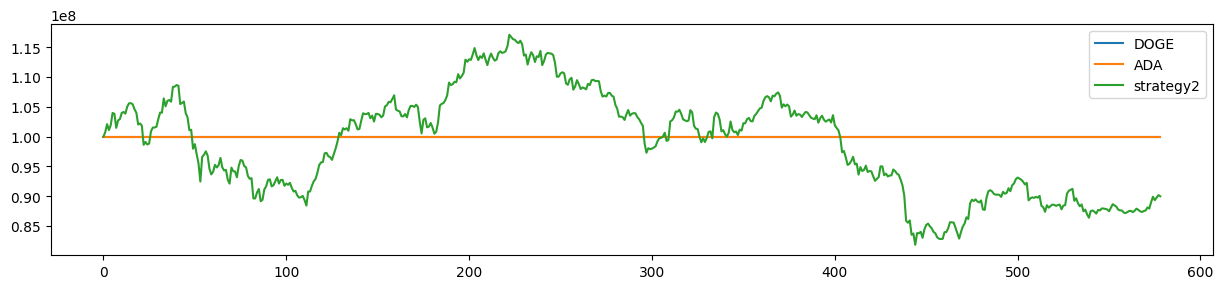

In [13]:

df2 = pd.DataFrame()
# df2['BTC'] = s_btc
# df2['ETH'] = s_eth
df2['DOGE'] = s_doge
df2['ADA'] = s_ada
# df2['strategy1'] = s1
df2['strategy2'] = s2
# df2['strategy3'] = s3
# df2['strategy4'] = s4

df2.plot( figsize=(15,3) )